# Ocular Disease Recognition

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

import os


In [4]:
df = pd.read_csv("/content/drive/MyDrive/full_df.csv")
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [5]:
def has_cataract(text):
    if "cataract" in text:
        return 1
    else:
        return 0

In [6]:
df["left_cataract"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_cataract(x))
df["right_cataract"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_cataract(x))

In [7]:
left_cataract = df.loc[(df.C ==1) & (df.left_cataract == 1)]["Left-Fundus"].values
left_cataract[:15]

array(['0_left.jpg', '81_left.jpg', '103_left.jpg', '119_left.jpg',
       '254_left.jpg', '294_left.jpg', '330_left.jpg', '448_left.jpg',
       '465_left.jpg', '477_left.jpg', '553_left.jpg', '560_left.jpg',
       '594_left.jpg', '611_left.jpg', '625_left.jpg'], dtype=object)

In [8]:
right_cataract = df.loc[(df.C ==1) & (df.right_cataract == 1)]["Right-Fundus"].values
right_cataract[:15]

array(['24_right.jpg', '81_right.jpg', '112_right.jpg', '188_right.jpg',
       '218_right.jpg', '345_right.jpg', '354_right.jpg', '477_right.jpg',
       '553_right.jpg', '560_right.jpg', '625_right.jpg', '726_right.jpg',
       '769_right.jpg', '949_right.jpg', '955_right.jpg'], dtype=object)

In [9]:

print("Number of images in left cataract: {}".format(len(left_cataract)))
print("Number of images in right cataract: {}".format(len(right_cataract)))

Number of images in left cataract: 304
Number of images in right cataract: 290


In [10]:
left_normal = df.loc[(df.C ==0) & (df["Left-Diagnostic Keywords"] == "normal fundus")]["Left-Fundus"].sample(250,random_state=42).values
right_normal = df.loc[(df.C ==0) & (df["Right-Diagnostic Keywords"] == "normal fundus")]["Right-Fundus"].sample(250,random_state=42).values
right_normal[:15]

array(['2964_right.jpg', '680_right.jpg', '500_right.jpg',
       '2368_right.jpg', '2820_right.jpg', '2769_right.jpg',
       '2696_right.jpg', '2890_right.jpg', '940_right.jpg',
       '2553_right.jpg', '3371_right.jpg', '3042_right.jpg',
       '919_right.jpg', '3427_right.jpg', '379_right.jpg'], dtype=object)

In [11]:
cataract = np.concatenate((left_cataract,right_cataract),axis=0)
normal = np.concatenate((left_normal,right_normal),axis=0)

In [12]:
print(len(cataract),len(normal))

594 500


In [13]:
import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img,img_to_array
dataset_dir = "/content/drive/MyDrive/preprocessed_images"
image_size=224
labels = []
dataset = []
def create_dataset(image_category,label):
    for img in tqdm(image_category):
        image_path = os.path.join(dataset_dir,img)
        try:
            image = cv2.imread(image_path,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue

        dataset.append([np.array(image),np.array(label)])
    random.shuffle(dataset)
    return dataset

In [14]:
dataset = create_dataset(cataract,1)
len(dataset)

100%|██████████| 594/594 [00:00<00:00, 604.95it/s]


59

In [15]:
dataset = create_dataset(normal,0)
len(dataset)

100%|██████████| 500/500 [00:00<00:00, 753.97it/s]


98

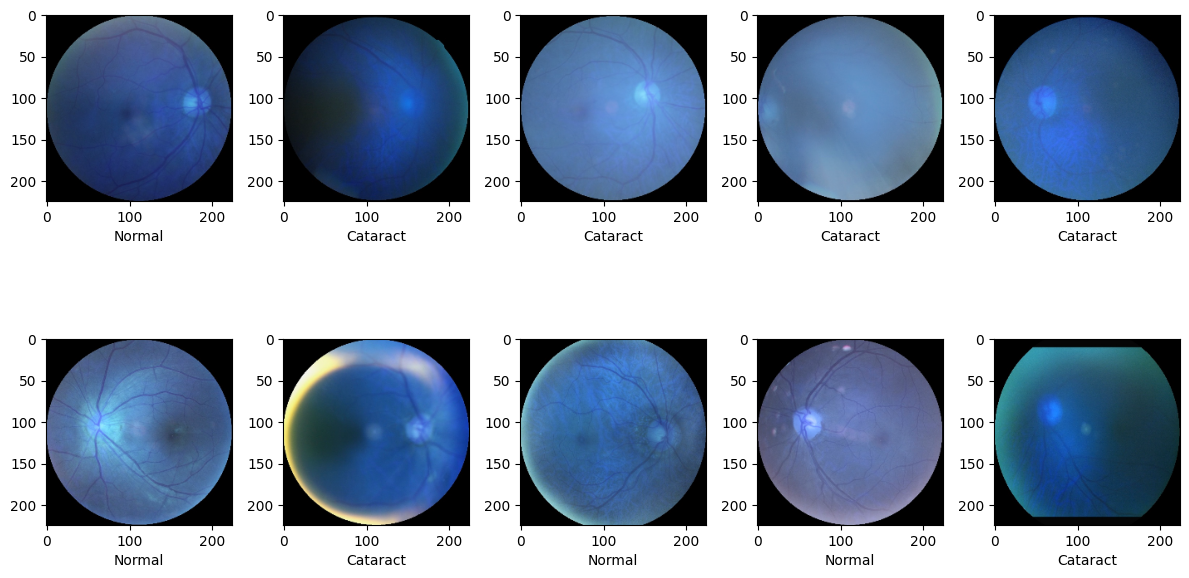

In [16]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    category = dataset[sample][1]
    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout()

In [17]:
x = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
y = np.array([i[1] for i in dataset])

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## VGG19

In [19]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights="imagenet",include_top = False,input_shape=(image_size,image_size,3))

In [20]:
for layer in vgg.layers:
    layer.trainable = False

In [21]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.models import Sequential

# Define the input shape
input_shape = (224, 224, 3)

# Create the VGG19 base model
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

# Build the Sequential model
model1 = Sequential()
model1.add(Input(shape=input_shape))
model1.add(vgg_base)
model1.add(Flatten())
model1.add(Dense(1, activation='sigmoid'))

# Freeze the VGG19 base layers to prevent them from being trained
for layer in vgg_base.layers:
    layer.trainable = False

model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 20049473 (76.48 MB)
Trainable params: 25089 (98.00 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [22]:
model1.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg19.weights.h5", monitor="val_acc", verbose=1, save_best_only=True,
                             save_weights_only=True, save_freq='epoch')
earlystop = EarlyStopping(monitor="val_acc", patience=5, verbose=1)


In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg19.weights.h5", monitor="val_acc", verbose=1, save_best_only=True,
                             save_weights_only=True, save_freq='epoch')
earlystop = EarlyStopping(monitor="val_acc", patience=5, verbose=1, mode='max')

history1 = model1.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test),
                      verbose=1, callbacks=[checkpoint, earlystop])


Epoch 1/10
3/3 [==============================] - ETA: 0s - loss: 4.7911 - accuracy: 0.6538 

3/3 [==============================] - 79s 27s/step - loss: 4.7911 - accuracy: 0.6538 - val_loss: 0.6481 - val_accuracy: 0.8500
Epoch 2/10
3/3 [==============================] - ETA: 0s - loss: 0.5307 - accuracy: 0.8846 

3/3 [==============================] - 66s 22s/step - loss: 0.5307 - accuracy: 0.8846 - val_loss: 0.0567 - val_accuracy: 0.9500
Epoch 3/10
3/3 [==============================] - ETA: 0s - loss: 0.1273 - accuracy: 0.9615 

3/3 [==============================] - 74s 26s/step - loss: 0.1273 - accuracy: 0.9615 - val_loss: 0.0565 - val_accuracy: 0.9500
Epoch 4/10
3/3 [==============================] - ETA: 0s - loss: 0.0107 - accuracy: 1.0000 

3/3 [==============================] - 73s 26s/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 6.8675e-04 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000 

3/3 [==============================] - 79s 26s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - ETA: 0s - loss: 0.0380 - accuracy: 0.9744 

3/3 [==============================] - 72s 26s/step - loss: 0.0380 - accuracy: 0.9744 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 1.0000 

3/3 [==============================] - 72s 26s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 4.4346e-04 - val_accuracy: 1.0000
Epoch 8/10
3/3 [==============================] - ETA: 0s - loss: 7.8623e-05 - accuracy: 1.0000 

3/3 [==============================] - 74s 26s/step - loss: 7.8623e-05 - accuracy: 1.0000 - val_loss: 1.1166e-04 - val_accuracy: 1.0000
Epoch 9/10
3/3 [==============================] - ETA: 0s - loss: 2.5919e-05 - accuracy: 1.0000 

3/3 [==============================] - 73s 25s/step - loss: 2.5919e-05 - accuracy: 1.0000 - val_loss: 4.1473e-05 - val_accuracy: 1.0000
Epoch 10/10
3/3 [==============================] - ETA: 0s - loss: 1.3527e-05 - accuracy: 1.0000 

3/3 [==============================] - 72s 25s/step - loss: 1.3527e-05 - accuracy: 1.0000 - val_loss: 2.0604e-05 - val_accuracy: 1.0000


In [25]:
loss,accuracy = model1.evaluate(x_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

1/1 [==============================] - 13s 13s/step - loss: 2.0604e-05 - accuracy: 1.0000
loss: 2.060420774796512e-05
Accuracy: 1.0


In [26]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred1 = (model1.predict(x_test) > 0.5).astype("int32")
accuracy_score(y_test, y_pred1)

1/1 [==============================] - 13s 13s/step


1.0

In [27]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



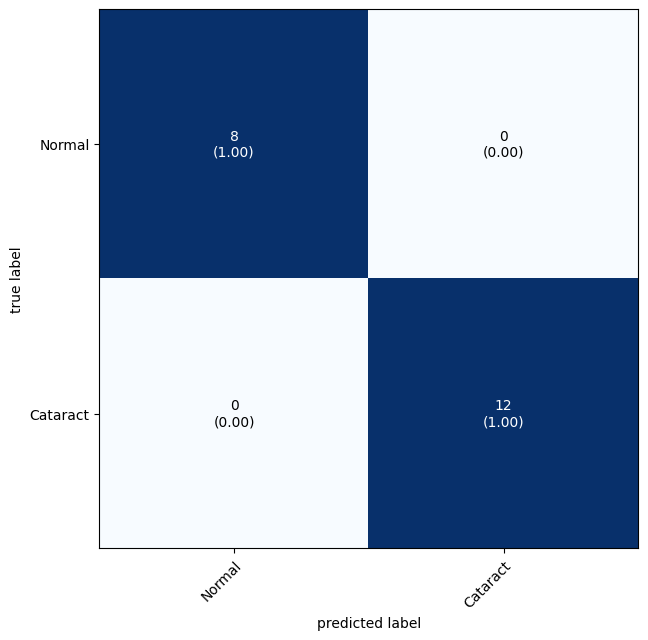

In [28]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred1)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["Normal","Cataract"],
                      show_normed = True);

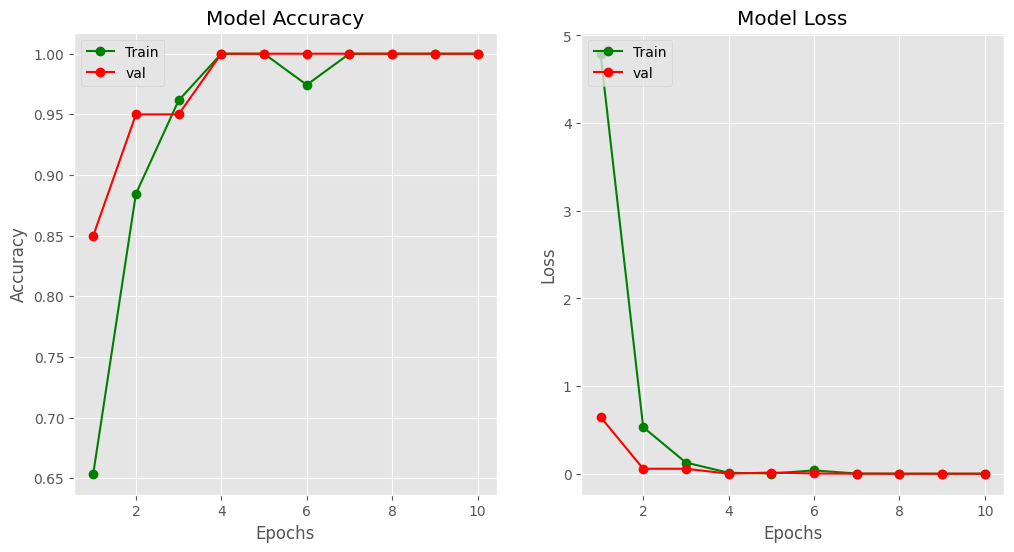

In [29]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,11)
plt.subplot(1,2,1)
plt.plot(epochs,history1.history["accuracy"],"go-")
plt.plot(epochs,history1.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history1.history["loss"],"go-")
plt.plot(epochs,history1.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

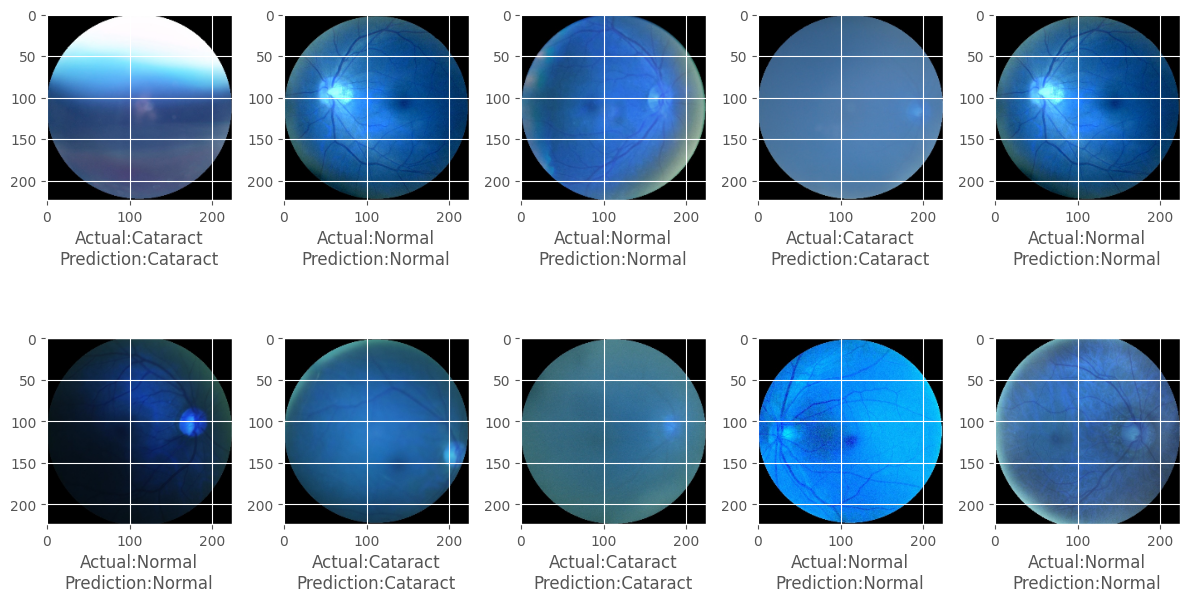

In [30]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_test[sample]
    pred_category = y_pred1[sample]

    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"

    if pred_category== 0:
        pred_label = "Normal"
    else:
        pred_label = "Cataract"

    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel("Actual:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout()

## ResNet50

In [31]:
from tensorflow.keras.applications.resnet50 import ResNet50
rnet = ResNet50(weights="imagenet",include_top = False,input_shape=(image_size,image_size,3))

In [32]:
for layer in rnet.layers:
    layer.trainable = False

In [33]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.models import Sequential

# Define the input shape
input_shape = (224, 224, 3)

# Create the ResNet50 base model
rnet = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Build the Sequential model
model2 = Sequential()
model2.add(Input(shape=input_shape))
model2.add(rnet)
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))

# Freeze the ResNet50 base layers to prevent them from being trained
for layer in rnet.layers:
    layer.trainable = False

model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 100353    
                                                                 
Total params: 23688065 (90.36 MB)
Trainable params: 100353 (392.00 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [34]:
model2.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("rnet50.weights.h5", monitor="val_acc", verbose=1, save_best_only=True,
                             save_weights_only=True, save_freq='epoch')
earlystop = EarlyStopping(monitor="val_acc", patience=5, verbose=1, mode='max')


In [36]:
history2 = model2.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test),
                    verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/10
3/3 [==============================] - ETA: 0s - loss: 5.6237 - accuracy: 0.5513

3/3 [==============================] - 23s 7s/step - loss: 5.6237 - accuracy: 0.5513 - val_loss: 0.3480 - val_accuracy: 0.8000
Epoch 2/10
3/3 [==============================] - ETA: 0s - loss: 1.7220 - accuracy: 0.8462

3/3 [==============================] - 19s 7s/step - loss: 1.7220 - accuracy: 0.8462 - val_loss: 2.6871 - val_accuracy: 0.7500
Epoch 3/10
3/3 [==============================] - ETA: 0s - loss: 2.4090 - accuracy: 0.8333

3/3 [==============================] - 17s 5s/step - loss: 2.4090 - accuracy: 0.8333 - val_loss: 0.1922 - val_accuracy: 0.9500
Epoch 4/10
3/3 [==============================] - ETA: 0s - loss: 0.1112 - accuracy: 0.9744

3/3 [==============================] - 18s 6s/step - loss: 0.1112 - accuracy: 0.9744 - val_loss: 1.0560 - val_accuracy: 0.8500
Epoch 5/10
3/3 [==============================] - ETA: 0s - loss: 0.4929 - accuracy: 0.9231

3/3 [==============================] - 24s 10s/step - loss: 0.4929 - accuracy: 0.9231 - val_loss: 1.7058 - val_accuracy: 0.8000
Epoch 6/10
3/3 [==============================] - ETA: 0s - loss: 0.3037 - accuracy: 0.9615

3/3 [==============================] - 17s 6s/step - loss: 0.3037 - accuracy: 0.9615 - val_loss: 0.8793 - val_accuracy: 0.9000
Epoch 7/10
3/3 [==============================] - ETA: 0s - loss: 0.0215 - accuracy: 0.9872

3/3 [==============================] - 19s 7s/step - loss: 0.0215 - accuracy: 0.9872 - val_loss: 0.4064 - val_accuracy: 0.9500
Epoch 8/10
3/3 [==============================] - ETA: 0s - loss: 2.2133e-06 - accuracy: 1.0000

3/3 [==============================] - 19s 6s/step - loss: 2.2133e-06 - accuracy: 1.0000 - val_loss: 0.1731 - val_accuracy: 0.9500
Epoch 9/10
3/3 [==============================] - ETA: 0s - loss: 6.5160e-06 - accuracy: 1.0000

3/3 [==============================] - 17s 6s/step - loss: 6.5160e-06 - accuracy: 1.0000 - val_loss: 0.0361 - val_accuracy: 0.9500
Epoch 10/10
3/3 [==============================] - ETA: 0s - loss: 8.7415e-05 - accuracy: 1.0000

3/3 [==============================] - 17s 6s/step - loss: 8.7415e-05 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000


In [37]:
loss,accuracy = model2.evaluate(x_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

1/1 [==============================] - 3s 3s/step - loss: 0.0040 - accuracy: 1.0000
loss: 0.004033590666949749
Accuracy: 1.0


In [38]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred2 = (model2.predict(x_test) > 0.5).astype("int32")
accuracy_score(y_test, y_pred2)

1/1 [==============================] - 5s 5s/step


1.0

In [39]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



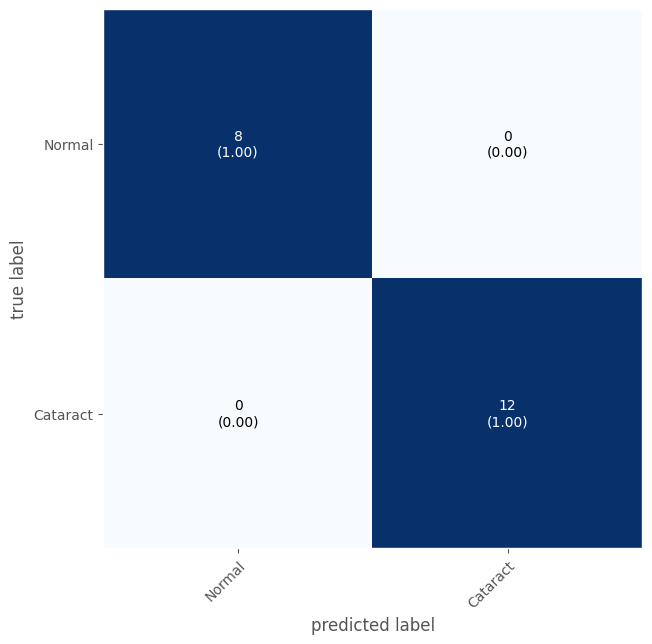

In [40]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred2)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["Normal","Cataract"],
                      show_normed = True);

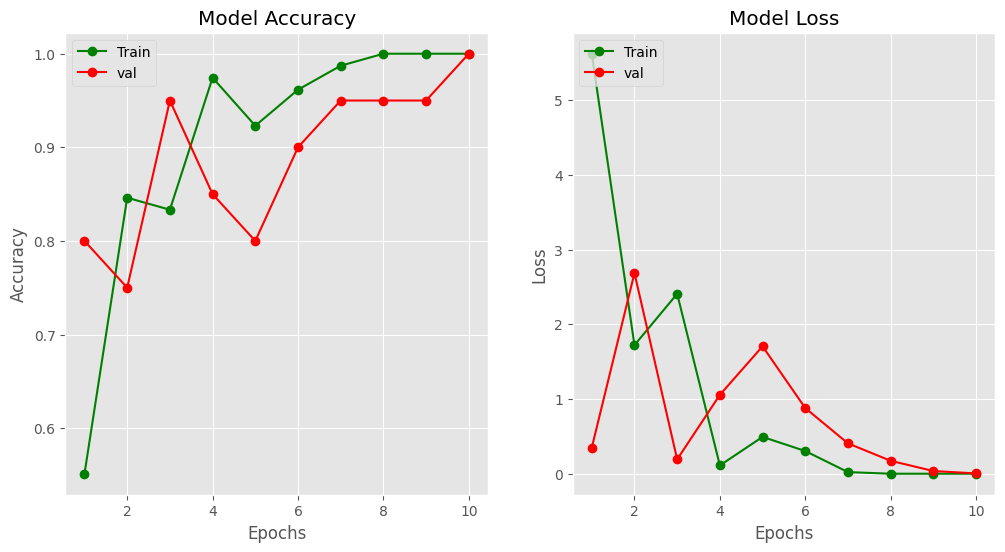

In [41]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,11)
plt.subplot(1,2,1)
plt.plot(epochs,history2.history["accuracy"],"go-")
plt.plot(epochs,history2.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history2.history["loss"],"go-")
plt.plot(epochs,history2.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

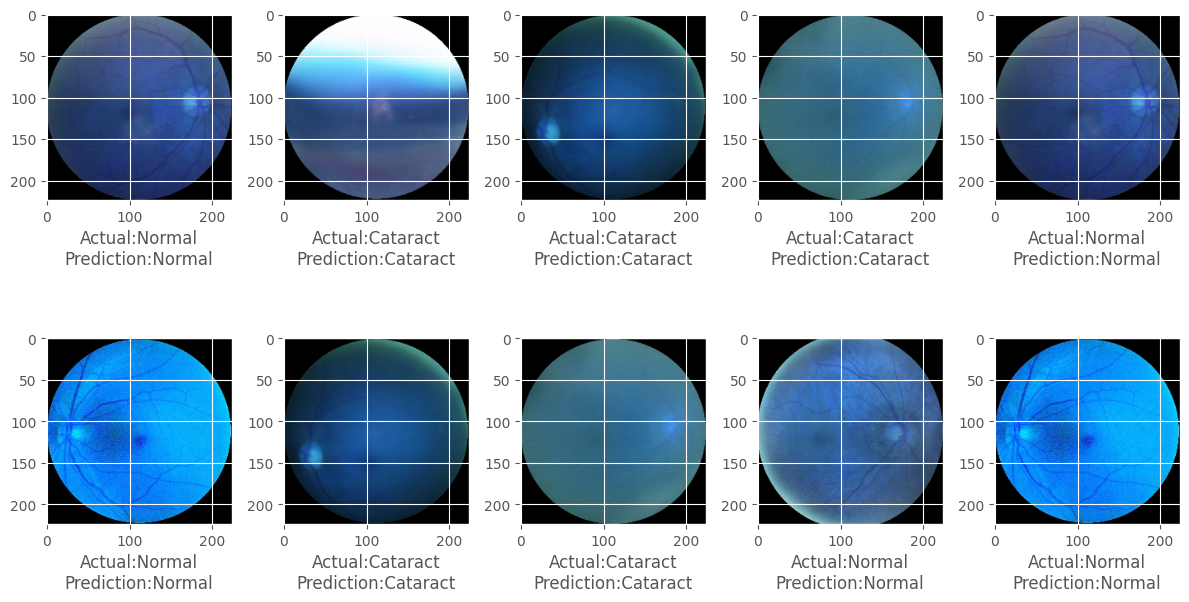

In [42]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_test[sample]
    pred_category = y_pred2[sample]

    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"

    if pred_category== 0:
        pred_label = "Normal"
    else:
        pred_label = "Cataract"

    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel("Actual:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout()

## Vision transformers

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Install tensorflow-addons
!pip install tensorflow-addons

import tensorflow_addons as tfa


In [1]:
# Downgrade TensorFlow to a compatible version
!pip install tensorflow==2.15.0

# Install TensorFlow Addons
!pip install tensorflow-addons

# Now you can import TensorFlow Addons
import tensorflow_addons as tfa


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [43]:
num_classes = 2
input_shape = (224, 224, 3)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (78, 224, 224, 3) - y_train shape: (78,)
x_test shape: (20, 224, 224, 3) - y_test shape: (20,)


In [44]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 32
image_size = 128 # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 6
mlp_head_units = [512, 256]  # Size of the dense layers of the final classifier

In [45]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [46]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [47]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 128 X 128
Patch size: 6 X 6
Patches per image: 441
Elements per patch: 108


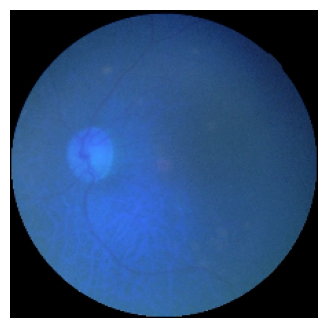

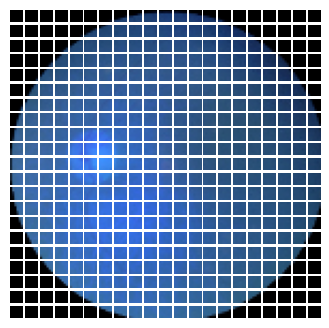

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [49]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [50]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.2)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model3 = keras.Model(inputs=inputs, outputs=logits)
    return model3

In [51]:
model3 = create_vit_classifier()
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 data_augmentation (Sequent  (None, 128, 128, 3)          7         ['input_7[0][0]']             
 ial)                                                                                             
                                                                                                  
 patches_1 (Patches)         (None, None, 108)            0         ['data_augmentation[0][0]']   
                                                                                                  
 patch_encoder (PatchEncode  (None, 441, 64)              35200     ['patches_1[0][0]']       

In [52]:
num_epochs = 30

In [53]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

model3.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
        ],
    )

checkpoint_filepath = "/tmp/checkpoint"
checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,)

#earlystop = EarlyStopping(monitor="val_accuracy",patience=10,verbose=1)

history3 = model3.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

model3.load_weights(checkpoint_filepath)
_, accuracy = model3.evaluate(x_test, y_test)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")

Epoch 1/30
3/3 [==============================] - 38s 8s/step - loss: 8.8283 - accuracy: 0.5714 - val_loss: 5.3801 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 25s 7s/step - loss: 6.2848 - accuracy: 0.5286 - val_loss: 5.9966 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 25s 7s/step - loss: 4.6457 - accuracy: 0.5571 - val_loss: 1.6931 - val_accuracy: 0.3750
Epoch 4/30
3/3 [==============================] - 24s 7s/step - loss: 2.8299 - accuracy: 0.5857 - val_loss: 2.1408 - val_accuracy: 0.7500
Epoch 5/30
3/3 [==============================] - 25s 7s/step - loss: 2.8819 - accuracy: 0.6000 - val_loss: 2.5742 - val_accuracy: 0.6250
Epoch 6/30
3/3 [==============================] - 24s 7s/step - loss: 2.5560 - accuracy: 0.6000 - val_loss: 1.5245 - val_accuracy: 0.5000
Epoch 7/30
3/3 [==============================] - 23s 7s/step - loss: 2.8686 - accuracy: 0.5714 - val_loss: 8.0755 - val_accuracy: 0.5000
Epoch 8/30
3/3 [==================

In [54]:
loss, accuracy = model3.evaluate(x_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

1/1 [==============================] - 2s 2s/step - loss: 4.7590 - accuracy: 0.4000
loss: 4.7589640617370605
Accuracy: 0.4000000059604645


In [55]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

In [56]:
len(val_acc),len(val_loss),len(acc),len(loss)

(30, 30, 30, 30)

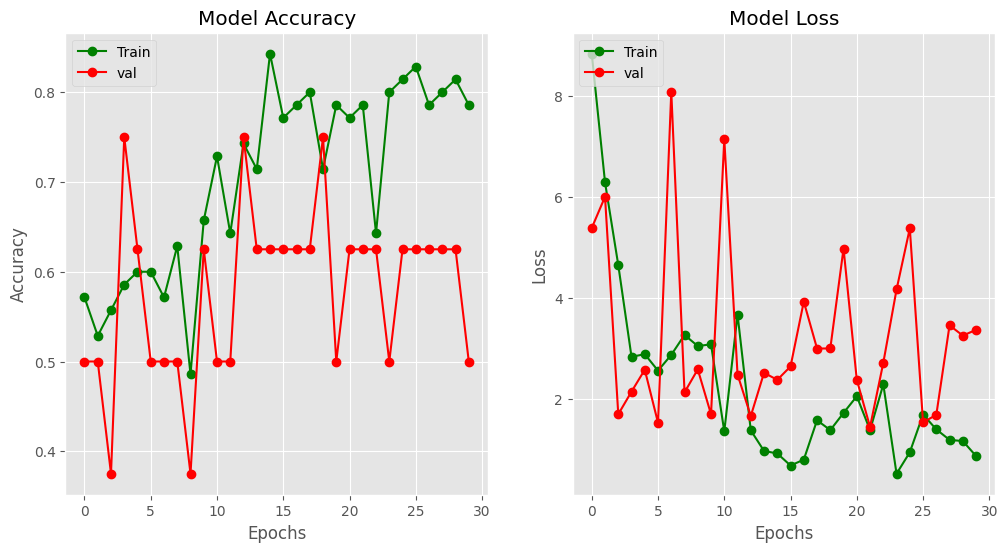

In [57]:
import matplotlib.pyplot as plt
EPOCHS = 30

plt.style.use("ggplot")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), history3.history['accuracy'],"go-")
plt.plot(range(EPOCHS), history3.history['val_accuracy'],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), history3.history['loss'],"go-")
plt.plot(range(EPOCHS), history3.history['val_loss'],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

# Comparison

In [58]:
accloss = {'Model':['VGG19','ResNet50','Vision Transformer'],
           'Training_Accuracy':[max(history1.history['accuracy']),max(history2.history['accuracy']),max(history3.history['accuracy'])],
           'Training_Loss':[min(history1.history['loss']),min(history2.history['loss']),min(history3.history['loss'])],
           'Validation_Accuracy':[max(history1.history['val_accuracy']),max(history2.history['val_accuracy']),max(history3.history['val_accuracy'])],
           'Validation_Loss':[min(history1.history['val_loss']),min(history2.history['val_loss']),min(history3.history['val_loss'])]}

In [59]:
accloss

{'Model': ['VGG19', 'ResNet50', 'Vision Transformer'],
 'Training_Accuracy': [1.0, 1.0, 0.8428571224212646],
 'Training_Loss': [1.3526871043723077e-05,
  2.2132710455480264e-06,
  0.5161620378494263],
 'Validation_Accuracy': [1.0, 1.0, 0.75],
 'Validation_Loss': [2.060420774796512e-05,
  0.004033590666949749,
  1.4425857067108154]}

In [60]:
comp = pd.DataFrame.from_dict(accloss)
comp

,Model,Training_Accuracy,Training_Loss,Validation_Accuracy,Validation_Loss
0,VGG19,1.000000,0.000014,1.00,0.000021
1,ResNet50,1.000000,0.000002,1.00,0.004034
2,Vision Transformer,0.842857,0.516162,0.75,1.442586


In [61]:
#Save model
import pickle

with open('Eye_Detection.pkl', 'wb') as file:
    pickle.dump(df, file)